In [1]:
import pandas as pd
import numpy as np
from Devices.MiddleWare.NeuralNet import  Network, FCLayer, ActivationLayer, sigmoid, \
    sigmoid_derivative, mse, mse_prime
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
#CONSTANTS
DATASOURCE = "/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/Devices/Edge_Device/data/train.txt"

In [3]:
import os

data=pd.read_csv(DATASOURCE,names=["T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro", "T_xmag", "T_ymag", "T_zmag",
"RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
"LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
"RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
"LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag",
"Activity"])

In [4]:
test_file =pd.read_csv(
            "/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/Devices/Edge_Device/data/test.txt", names=
            ["T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro", "T_xmag", "T_ymag", "T_zmag",
             "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
             "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
             "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
             "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag",
             "Activity"]

        )

In [5]:
data.head()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Activity
0,9.2831,-3.78680,-2.1588,-0.223130,0.065512,0.371860,-0.90635,0.444400,0.469390,-2.00840,...,-5.8133,-7.41080,-3.22160,0.262770,0.197950,-0.094747,0.59845,0.561860,-0.318700,16
1,8.4308,-0.49933,-4.4917,0.158800,-0.591020,0.033337,-0.92153,-0.263760,0.069446,7.28920,...,-16.3740,-23.10300,-4.55360,-0.197170,-0.840230,0.988890,0.52946,0.708510,0.533940,13
2,7.2541,-0.42351,3.8553,0.025037,-0.183020,-0.075056,-0.77674,-0.064192,-0.934720,6.97430,...,-5.8763,6.09290,-0.26275,0.655960,0.441540,-0.894670,0.25135,0.650310,0.448100,10
3,8.9127,0.27620,3.8054,-0.027373,0.005032,-0.028203,-0.30419,0.056495,-0.393840,8.03140,...,-9.8110,-0.24252,-0.44763,0.040195,-0.002469,0.011290,0.40445,0.034603,-0.295240,7
4,7.7573,1.34470,5.8554,-0.003474,-0.006085,0.003284,-0.79246,-0.077493,0.111570,0.37453,...,-2.7708,-9.08870,2.62620,-0.001780,0.014045,-0.009205,0.73810,0.300850,-0.057091,1


In [6]:
data.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Activity
count,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,...,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06
mean,7.766013e+00,-8.108328e-01,2.771972e+00,-2.775299e-03,1.399722e-02,-3.308866e-03,-5.984059e-01,6.174654e-02,-2.725261e-01,4.261472e+00,...,-7.325207e+00,-3.214375e+00,-5.301398e-01,-1.600781e-02,2.779592e-02,-2.436052e-03,4.582406e-01,2.954169e-01,6.455338e-02,9.999634e+00
std,5.637559e+00,2.623753e+00,3.539207e+00,7.934047e-01,6.904070e-01,3.106147e-01,3.561477e-01,3.404437e-01,3.734893e-01,5.822576e+00,...,5.807833e+00,5.921931e+00,3.393634e+00,8.686034e-01,4.837394e-01,1.158971e+00,3.801951e-01,3.840804e-01,3.573272e-01,5.477090e+00
min,-9.971500e+01,-4.994100e+01,-6.266400e+01,-2.785100e+01,-2.359800e+01,-1.206700e+01,-1.422600e+00,-1.022800e+00,-1.080600e+00,-4.953500e+01,...,-1.180300e+02,-1.198100e+02,-4.338200e+01,-1.208500e+01,-6.925800e+00,-6.783000e+00,-8.443400e-01,-9.017600e-01,-1.126000e+00,1.000000e+00
25%,6.907000e+00,-1.509425e+00,9.018900e-01,-1.630500e-01,-1.020700e-01,-9.762900e-02,-8.247100e-01,-1.789100e-01,-6.019100e-01,9.532800e-02,...,-9.813000e+00,-7.957200e+00,-2.212500e+00,-3.148700e-01,-1.236200e-01,-3.617925e-01,2.922600e-01,1.904275e-02,-1.709700e-01,5.000000e+00
50%,8.831000e+00,-3.895300e-01,2.705500e+00,4.550000e-04,1.746300e-02,-2.687000e-03,-6.897850e-01,2.245000e-02,-3.090500e-01,4.145700e+00,...,-8.578200e+00,-2.284400e+00,-7.820300e-01,-4.357000e-03,4.310000e-04,-6.930000e-04,5.084200e-01,3.513900e-01,8.168050e-02,1.000000e+01
75%,9.691300e+00,4.139200e-01,4.407900e+00,1.647300e-01,1.315600e-01,8.871400e-02,-4.922975e-01,2.822925e-01,4.060200e-02,8.506200e+00,...,-2.690075e+00,1.096125e-01,3.974500e-01,1.969125e-01,1.423000e-01,5.724000e-01,6.902200e-01,5.849800e-01,2.982400e-01,1.500000e+01
max,9.369400e+01,4.101300e+01,1.205300e+02,2.767100e+01,1.437900e+01,1.926200e+01,1.021500e+00,1.030900e+00,9.633900e-01,7.165200e+01,...,1.736200e+01,7.894700e+01,6.096800e+01,1.915800e+01,8.918400e+00,7.109000e+00,1.374100e+00,1.246600e+00,1.042600e+00,1.900000e+01


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026000 entries, 0 to 1025999
Data columns (total 46 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   T_xacc    1026000 non-null  float64
 1   T_yacc    1026000 non-null  float64
 2   T_zacc    1026000 non-null  float64
 3   T_xgyro   1026000 non-null  float64
 4   T_ygyro   1026000 non-null  float64
 5   T_zgyro   1026000 non-null  float64
 6   T_xmag    1026000 non-null  float64
 7   T_ymag    1026000 non-null  float64
 8   T_zmag    1026000 non-null  float64
 9   RA_xacc   1026000 non-null  float64
 10  RA_yacc   1026000 non-null  float64
 11  RA_zacc   1026000 non-null  float64
 12  RA_xgyro  1026000 non-null  float64
 13  RA_ygyro  1026000 non-null  float64
 14  RA_zgyro  1026000 non-null  float64
 15  RA_xmag   1026000 non-null  float64
 16  RA_ymag   1026000 non-null  float64
 17  RA_zmag   1026000 non-null  float64
 18  LA_xacc   1026000 non-null  float64
 19  LA_yacc   1026000 non

In [8]:
def prepData(data,scaling):
    x = data.drop(columns=["Activity"])
    y = data["Activity"]
    x = x.to_numpy()
    y = y.to_numpy()
    y = [int(i)  for i in y]
    if scaling:
        scaler.fit(x)
        x = scaler.transform(x)
    return x, y

In [9]:
def fit_and_test_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    print("Score: ", model.score(X_test, y_test))
    return model

In [10]:
def print_confusion_matrix(model,X_test,y_test,name="confusion_matrix.png"):
    Y_pred=model.predict(X_test)
    cm=confusion_matrix(y_test,Y_pred)
    matfig = plt.figure(figsize=(6,6))
    plt.matshow(cm,  fignum=matfig.number)
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(name)

In [11]:
def print_report(model,X_test,y_test,name="classification_report.txt"):
    Y_pred=model.predict(X_test)
    report=classification_report(y_test,Y_pred,output_dict=True)
    df = pd.DataFrame(report).transpose()
    print(report)
    df.to_latex(name)

In [12]:
test_file.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Activity
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,...,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,7.763538,-0.812870,2.740702,-0.002985,0.010975,-0.003338,-0.598703,0.061573,-0.272435,4.252703,...,-7.318028,-3.249790,-0.532417,-0.012319,0.028480,-0.002612,0.456907,0.296690,0.064059,10.003298
std,5.640858,2.616499,3.529619,0.799447,0.696710,0.312122,0.355672,0.340365,0.372714,5.810214,...,5.837062,5.958010,3.383489,0.865481,0.481605,1.158797,0.380642,0.382217,0.357898,5.478496
min,-26.607000,-27.102000,-41.763000,-25.579000,-16.736000,-8.715800,-1.371500,-1.015500,-1.076700,-37.793000,...,-93.324000,-95.898000,-36.237000,-7.929700,-4.163100,-6.491100,-0.841560,-0.900440,-1.114300,1.000000
25%,6.907375,-1.509625,0.878135,-0.161330,-0.105980,-0.096374,-0.824623,-0.178182,-0.600260,0.091204,...,-9.813200,-8.034750,-2.207325,-0.311840,-0.123262,-0.363140,0.289660,0.021386,-0.172872,5.000000
50%,8.824650,-0.389550,2.686600,0.000512,0.017202,-0.002439,-0.689520,0.022867,-0.310770,4.123500,...,-8.566300,-2.305500,-0.774955,-0.004263,0.000438,-0.000537,0.507775,0.350980,0.081239,10.000000
75%,9.685700,0.410365,4.379775,0.165657,0.128943,0.089654,-0.494460,0.282825,0.040339,8.492600,...,-2.652700,0.092378,0.399720,0.201195,0.142720,0.573970,0.689730,0.584022,0.298090,15.000000
max,72.363000,26.218000,88.268000,13.419000,13.775000,12.293000,1.013900,1.030100,0.917170,68.503000,...,12.104000,66.064000,26.718000,16.533000,5.690600,6.126700,1.347200,1.241500,1.038200,19.000000


In [13]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 46 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   T_xacc    114000 non-null  float64
 1   T_yacc    114000 non-null  float64
 2   T_zacc    114000 non-null  float64
 3   T_xgyro   114000 non-null  float64
 4   T_ygyro   114000 non-null  float64
 5   T_zgyro   114000 non-null  float64
 6   T_xmag    114000 non-null  float64
 7   T_ymag    114000 non-null  float64
 8   T_zmag    114000 non-null  float64
 9   RA_xacc   114000 non-null  float64
 10  RA_yacc   114000 non-null  float64
 11  RA_zacc   114000 non-null  float64
 12  RA_xgyro  114000 non-null  float64
 13  RA_ygyro  114000 non-null  float64
 14  RA_zgyro  114000 non-null  float64
 15  RA_xmag   114000 non-null  float64
 16  RA_ymag   114000 non-null  float64
 17  RA_zmag   114000 non-null  float64
 18  LA_xacc   114000 non-null  float64
 19  LA_yacc   114000 non-null  float64
 20  LA_z

In [14]:
scaler=StandardScaler()
perceptron=Perceptron(tol=1e-3, random_state=0, max_iter=500)
clf = RandomForestClassifier(n_estimators=10)

In [15]:
X_train_scaled, y_train = prepData(data, True)
X_test_scaled, y_test = prepData(test_file, True)

In [16]:
#perceptron=fit_and_test_model(perceptron,X_train_scaled,y_train,X_test_scaled,y_test)

In [17]:
#clf= fit_and_test_model(clf,X_train_non_scaled,y_train,X_test_non_scaled,y_test)

In [18]:
#print_confusion_matrix(perceptron,X_test_scaled,y_test)

In [19]:
#print_confusion_matrix(clf,X_test_non_scaled,y_test)

In [20]:
#print_report(perceptron,X_test_scaled,y_test)

In [21]:
#print_report(clf,X_test_non_scaled,y_test)

{'1': {'precision': 0.3603659482090247, 'recall': 0.38204833141542005, 'f1-score': 0.37089052026811364, 'support': 6083}, '2': {'precision': 0.2686618507051944, 'recall': 0.13205951978356442, 'f1-score': 0.17707742886294073, 'support': 5914}, '3': {'precision': 0.6651819801476203, 'recall': 0.8761314113308749, 'f1-score': 0.7562210648148149, 'support': 5966}, '4': {'precision': 0.9771540469973891, 'recall': 1.0, 'f1-score': 0.9884450313634863, 'support': 5988}, '5': {'precision': 0.17116730961565937, 'recall': 0.19913563829787234, 'f1-score': 0.184095274683058, 'support': 6016}, '6': {'precision': 0.3057052592454934, 'recall': 0.5486076371519093, 'f1-score': 0.3926248582851005, 'support': 5997}, '7': {'precision': 0.20586080586080585, 'recall': 0.14071106659989985, 'f1-score': 0.16716240333135038, 'support': 5991}, '8': {'precision': 0.4055389221556886, 'recall': 0.44895591647331784, 'f1-score': 0.42614440773949974, 'support': 6034}, '9': {'precision': 0.36104718066743385, 'recall': 0.

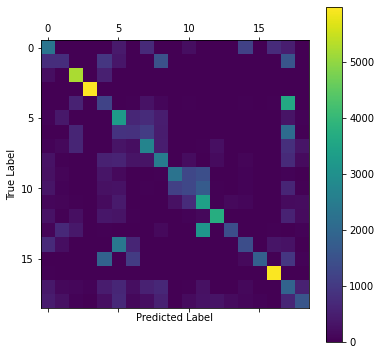

In [22]:

from sklearn.metrics import accuracy_score
net = Network(outputdimension=19,inputdimension=X_train_scaled.shape[1],precision=10000)
net.add(FCLayer(X_train_scaled.shape[1], 19))
#net.add(ActivationLayer(sigmoid, sigmoid_derivative))
# train
net.use(mse, mse_prime)
net.fit(X_train_scaled, y_train, epochs=1, learning_rate=1000)
# test
out = net.predict(X_train_scaled)
print_report(net,X_test_scaled,y_test,name="CR_full.txt")
print_confusion_matrix(net,X_test_scaled,y_test,name="CM_full.png")
print(accuracy_score(y_test,net.predict(X_test_scaled)))

{'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6083}, '2': {'precision': 0.9991551199729638, 'recall': 0.9998309097057829, 'f1-score': 0.9994929006085193, 'support': 5914}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5966}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5988}, '5': {'precision': 0.9306823456599103, 'recall': 0.9998337765957447, 'f1-score': 0.964019552848786, 'support': 6016}, '6': {'precision': 0.9973549638511726, 'recall': 0.9431382357845589, 'f1-score': 0.9694892012341447, 'support': 5997}, '7': {'precision': 0.9581993569131833, 'recall': 0.9948255716908696, 'f1-score': 0.9761690279256408, 'support': 5991}, '8': {'precision': 0.9932584269662922, 'recall': 0.9522704673516739, 'f1-score': 0.9723326846602928, 'support': 6034}, '9': {'precision': 0.9993331110370124, 'recall': 0.9994997498749375, 'f1-score': 0.9994164235097958, 'support': 5997}, '10': {'precision': 0.9986715376951179, 'recall': 0.999667553191

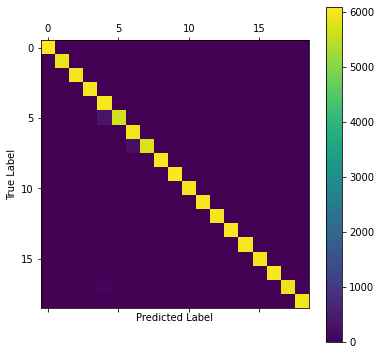

In [23]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf=svm.SVC()
clf.fit(X_train_scaled, y_train)
print_report(clf,X_test_scaled,y_test,name="CR_SVM_full.txt")
print_confusion_matrix(clf,X_test_scaled,y_test,name="CM_SVM_full.png")
print(accuracy_score(y_test,clf.predict(X_test_scaled)))

In [24]:
data_small=data.drop(columns= ["T_xacc", "T_yacc", "T_zacc", "T_xgyro","T_ygyro","T_zgyro","T_xmag", "T_ymag", "T_zmag","RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro","RA_ygyro","RA_zgyro","RA_xmag", "RA_ymag", "RA_zmag","RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro","RL_ygyro","RL_zgyro" ,"RL_xmag", "RL_ymag", "RL_zmag","LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro","LL_ygyro","LL_zgyro" ,"LL_xmag", "LL_ymag", "LL_zmag"])
test_small=test_file.drop(columns= ["T_xacc", "T_yacc", "T_zacc", "T_xgyro","T_ygyro","T_zgyro","T_xmag", "T_ymag", "T_zmag","RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro","RA_ygyro","RA_zgyro","RA_xmag", "RA_ymag", "RA_zmag","RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro","RL_ygyro","RL_zgyro" ,"RL_xmag", "RL_ymag", "RL_zmag","LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro","LL_ygyro","LL_zgyro" ,"LL_xmag", "LL_ymag", "LL_zmag"])

In [25]:
data_small.describe()

,LA_xacc,LA_yacc,LA_zacc,LA_xgyro,LA_ygyro,LA_zgyro,LA_xmag,LA_ymag,LA_zmag,Activity
count,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06,1.026000e+06
mean,4.278872e+00,-3.910797e+00,3.823131e+00,-1.834539e-02,-2.317579e-02,2.346812e-03,-2.783461e-01,3.232670e-01,-3.436906e-01,9.999634e+00
std,6.023010e+00,4.441512e+00,4.397240e+00,9.381165e-01,8.124536e-01,9.824210e-01,4.685791e-01,4.380726e-01,4.480771e-01,5.477090e+00
min,-5.575500e+01,-6.192600e+01,-6.450600e+01,-2.783100e+01,-1.931900e+01,-1.897600e+01,-2.638000e+00,-1.566900e+00,-3.756300e+00,1.000000e+00
25%,1.151300e-01,-6.019700e+00,1.643900e+00,-1.493300e-01,-1.684500e-01,-1.745500e-01,-5.861200e-01,-1.150600e-02,-6.799600e-01,5.000000e+00
50%,4.585550e+00,-3.414400e+00,3.492900e+00,-1.413000e-03,-2.331000e-03,-6.016000e-03,-3.869700e-01,3.798000e-01,-4.508600e-01,1.000000e+01
75%,8.754200e+00,-1.681375e+00,7.080800e+00,1.396700e-01,1.518500e-01,1.695300e-01,6.382300e-02,6.222900e-01,-4.539000e-03,1.500000e+01
max,7.101600e+01,6.201500e+01,6.270200e+01,2.267600e+01,1.225700e+01,1.346500e+01,1.215300e+00,3.015200e+00,4.040300e+00,1.900000e+01


In [26]:
scaler=StandardScaler()
perceptron=Perceptron(tol=1e-3, random_state=0, max_iter=500)
clf = svm.SVC()

In [27]:
X_train_scaled, y_train = prepData(data_small, True)
X_test_scaled, y_test = prepData(test_small, True)

In [28]:
#perceptron=fit_and_test_model(perceptron,X_train_scaled,y_train,X_test_scaled,y_test)

In [29]:
#clf= fit_and_test_model(clf,X_train_non_scaled,y_train,X_test_non_scaled,y_test)

In [30]:
#print_confusion_matrix(perceptron,X_test_scaled,y_test)

In [31]:
#print_confusion_matrix(clf,X_test_non_scaled,y_test)

In [32]:
#print_report(perceptron,X_test_scaled,y_test)

In [33]:
#print_report(clf,X_test_non_scaled,y_test)

/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

{'1': {'precision': 0.22028733130169786, 'recall': 0.24954792043399637, 'f1-score': 0.23400647448743642, 'support': 6083}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5914}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5966}, '4': {'precision': 0.7940714908456844, 'recall': 0.7605210420841684, 'f1-score': 0.7769342318519151, 'support': 5988}, '5': {'precision': 0.009404388714733543, 'recall': 0.0004986702127659574, 'f1-score': 0.0009471191791633779, 'support': 6016}, '6': {'precision': 0.6011560693641619, 'recall': 0.6589961647490412, 'f1-score': 0.6287487073422957, 'support': 5997}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5991}, '8': {'precision': 0.047322540473225407, 'recall': 0.0188929400066291, 'f1-score': 0.027004619211180858, 'support': 6034}, '9': {'precision': 0.3333333333333333, 'recall': 0.008504252126063032, 'f1-score': 0.016585365853658537, 'support': 5997}, '10': {'precision': 0.3432966073960947, 'rec

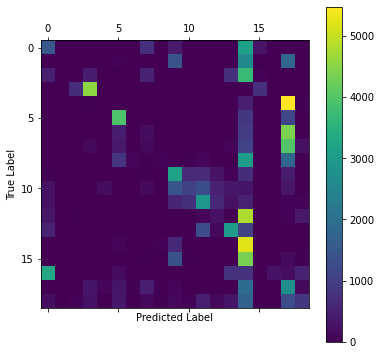

In [34]:
from sklearn.metrics import accuracy_score
net = Network(outputdimension=19,inputdimension=X_train_scaled.shape[1],precision=10000)
net.add(FCLayer(X_train_scaled.shape[1], 19))
#net.add(ActivationLayer(sigmoid, sigmoid_derivative))
# train
net.use(mse, mse_prime)
net.fit(X_train_scaled, y_train, epochs=1, learning_rate=1000)
# test
out = net.predict(X_train_scaled)
print_report(net,X_test_scaled,y_test,name="CR_small.txt")
print_confusion_matrix(net,X_test_scaled,y_test,name="CM_small.png")
print(accuracy_score(y_test,net.predict(X_test_scaled)))

{'1': {'precision': 0.9843927816615184, 'recall': 0.9953970080552359, 'f1-score': 0.989864312571522, 'support': 6083}, '2': {'precision': 0.9760488932936902, 'recall': 0.9991545485289144, 'f1-score': 0.9874665775401069, 'support': 5914}, '3': {'precision': 0.9968206157965194, 'recall': 0.9984914515588333, 'f1-score': 0.9976553341148886, 'support': 5966}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5988}, '5': {'precision': 0.8746682394573873, 'recall': 0.9860372340425532, 'f1-score': 0.9270198468510705, 'support': 6016}, '6': {'precision': 0.9263513513513514, 'recall': 0.9144572286143071, 'f1-score': 0.920365863891919, 'support': 5997}, '7': {'precision': 0.7939136588818118, 'recall': 0.9362376898681355, 'f1-score': 0.8592218137254901, 'support': 5991}, '8': {'precision': 0.9262630860263996, 'recall': 0.6745111037454425, 'f1-score': 0.7805907172995781, 'support': 6034}, '9': {'precision': 0.9678258043548911, 'recall': 0.993163248290812, 'f1-score': 0.980330836968

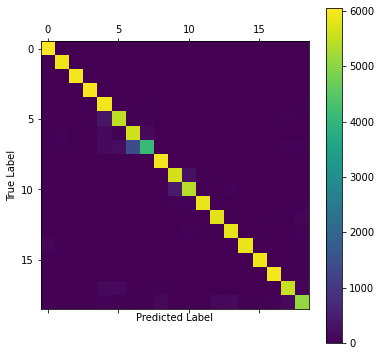

In [35]:
clf=svm.SVC()
clf.fit(X_train_scaled, y_train)
print_report(clf,X_test_scaled,y_test,name="CR_SVM_small.txt")
print_confusion_matrix(clf,X_test_scaled,y_test,name="CM_SVM_small.png")
print(accuracy_score(y_test,clf.predict(X_test_scaled)))

In [36]:

activity_mapping={
    2:1,
    3:1,
    4:1,
    16:15,
    6: 5,
    10:11,
    13:14,
    7:1,
}
filtered_activities=[5,11,12,14,15,17]
data_filtered=data
test_filtered=test_file
for key in activity_mapping.keys():
    data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
    test_filtered[test_filtered['Activity']==key]['Activity']=activity_mapping[key]
data_filtered=data_filtered[data_filtered['Activity'].isin(filtered_activities)]
test_filtered=test_filtered[test_filtered['Activity'].isin(filtered_activities)]
activity_encoding = {
    5:1,
    11: 2,
    12: 3,
    14: 4,
    15: 5,
    17: 6,
}
for key in activity_encoding.keys():
    data_filtered.loc[data_filtered['Activity'] == key, 'Activity'] = activity_encoding[key]
    test_filtered.loc[test_filtered['Activity'] == key, 'Activity'] = activity_encoding[key]

/tmp/ipykernel_9777/3493768058.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
/tmp/ipykernel_9777/3493768058.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filtered[test_filtered['Activity']==key]['Activity']=activity_mapping[key]
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a 

In [37]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323956 entries, 5 to 1025994
Data columns (total 46 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   T_xacc    323956 non-null  float64
 1   T_yacc    323956 non-null  float64
 2   T_zacc    323956 non-null  float64
 3   T_xgyro   323956 non-null  float64
 4   T_ygyro   323956 non-null  float64
 5   T_zgyro   323956 non-null  float64
 6   T_xmag    323956 non-null  float64
 7   T_ymag    323956 non-null  float64
 8   T_zmag    323956 non-null  float64
 9   RA_xacc   323956 non-null  float64
 10  RA_yacc   323956 non-null  float64
 11  RA_zacc   323956 non-null  float64
 12  RA_xgyro  323956 non-null  float64
 13  RA_ygyro  323956 non-null  float64
 14  RA_zgyro  323956 non-null  float64
 15  RA_xmag   323956 non-null  float64
 16  RA_ymag   323956 non-null  float64
 17  RA_zmag   323956 non-null  float64
 18  LA_xacc   323956 non-null  float64
 19  LA_yacc   323956 non-null  float64
 20  LA_

In [38]:
scaler=StandardScaler()
perceptron=Perceptron(tol=1e-3, random_state=0, max_iter=500)
clf = RandomForestClassifier(n_estimators=10)

In [39]:
X_train_scaled, y_train = prepData(data_filtered, True)
X_test_scaled, y_test = prepData(test_filtered, True)


In [40]:
#perceptron=fit_and_test_model(perceptron,X_train_scaled,y_train,X_test_scaled,y_test)

In [41]:
#clf= fit_and_test_model(clf,X_train_non_scaled,y_train,X_test_non_scaled,y_test)

In [42]:
#print_confusion_matrix(perceptron,X_test_scaled,y_test)

In [43]:
#print_confusion_matrix(clf,X_test_non_scaled,y_test)

In [44]:
#print_report(perceptron,X_test_scaled,y_test)

In [45]:
#print_report(clf,X_test_non_scaled,y_test)

{'1': {'precision': 0.9917559769167353, 'recall': 0.9998337765957447, 'f1-score': 0.9957784951576857, 'support': 6016}, '2': {'precision': 0.7668107173725152, 'recall': 0.7439208452121415, 'f1-score': 0.7551923731699012, 'support': 5963}, '3': {'precision': 0.775012871117213, 'recall': 0.7515393576302213, 'f1-score': 0.7630956404190604, 'support': 6009}, '4': {'precision': 0.9458221450007898, 'recall': 0.9920477137176938, 'f1-score': 0.9683836015201748, 'support': 6036}, '5': {'precision': 0.9981718464351006, 'recall': 1.0, 'f1-score': 0.9990850869167429, 'support': 6006}, '6': {'precision': 0.9990031566705433, 'recall': 0.9998337213169272, 'f1-score': 0.9994182664339731, 'support': 6014}, 'accuracy': 0.9148263233825324, 'macro avg': {'precision': 0.9127627855854828, 'recall': 0.9145292357454546, 'f1-score': 0.9134922439362563, 'support': 36044}, 'weighted avg': {'precision': 0.9129940119991495, 'recall': 0.9148263233825324, 'f1-score': 0.9137561634804832, 'support': 36044}}
0.91482632

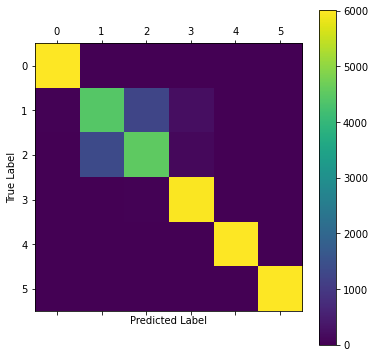

In [46]:
from sklearn.metrics import accuracy_score
net = Network(outputdimension=6,inputdimension=X_train_scaled.shape[1],precision=10000)
net.add(FCLayer(X_train_scaled.shape[1], 6))
#net.add(ActivationLayer(sigmoid, sigmoid_derivative))
# train
net.use(mse, mse_prime)
net.fit(X_train_scaled, y_train, epochs=1, learning_rate=1000)
# test
out = net.predict(X_train_scaled)
print_report(net,X_test_scaled,y_test,name="CR_filtered.txt")
print_confusion_matrix(net,X_test_scaled,y_test,name="CM_filtered.png")
print(accuracy_score(y_test,net.predict(X_test_scaled)))

{'1': {'precision': 1.0, 'recall': 0.9998337765957447, 'f1-score': 0.9999168813897431, 'support': 6016}, '2': {'precision': 0.999832327297116, 'recall': 1.0, 'f1-score': 0.9999161566194348, 'support': 5963}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6009}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6036}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6006}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6014}, 'accuracy': 0.999972256131395, 'macro avg': {'precision': 0.9999720545495193, 'recall': 0.9999722960992908, 'f1-score': 0.9999721730015296, 'support': 36044}, 'weighted avg': {'precision': 0.9999722607832844, 'recall': 0.999972256131395, 'f1-score': 0.9999722561414489, 'support': 36044}}
0.999972256131395


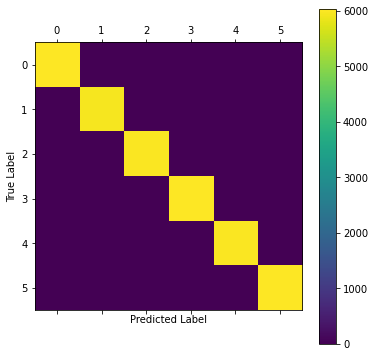

In [47]:
clf=svm.SVC()
clf.fit(X_train_scaled, y_train)
print_report(clf,X_test_scaled,y_test,name="CR_SVM_filtered.txt")
print_confusion_matrix(clf,X_test_scaled,y_test,name="CM_SVM_filtered.png")
print(accuracy_score(y_test,clf.predict(X_test_scaled)))

In [48]:
data_small=data_filtered.drop(columns= ["T_xacc", "T_yacc", "T_zacc", "T_xgyro","T_ygyro","T_zgyro","T_xmag", "T_ymag", "T_zmag","RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro","RA_ygyro","RA_zgyro","RA_xmag", "RA_ymag", "RA_zmag","RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro","RL_ygyro","RL_zgyro" ,"RL_xmag", "RL_ymag", "RL_zmag","LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro","LL_ygyro","LL_zgyro" ,"LL_xmag", "LL_ymag", "LL_zmag"])
test_filtered=test_filtered.drop(columns= ["T_xacc", "T_yacc", "T_zacc", "T_xgyro","T_ygyro","T_zgyro","T_xmag", "T_ymag", "T_zmag","RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro","RA_ygyro","RA_zgyro","RA_xmag", "RA_ymag", "RA_zmag","RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro","RL_ygyro","RL_zgyro" ,"RL_xmag", "RL_ymag", "RL_zmag","LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro","LL_ygyro","LL_zgyro" ,"LL_xmag", "LL_ymag", "LL_zmag"])

In [49]:
scaler=StandardScaler()
perceptron=Perceptron(tol=1e-3, random_state=0, max_iter=500)
clf = svm.SVC()

In [50]:

X_train_scaled, y_train = prepData(data_small, True)
X_test_scaled, y_test = prepData(test_filtered, True)

In [51]:
df_describe = pd.DataFrame(X_train_scaled)
df_describe.info()
#perceptron=fit_and_test_model(perceptron,X_train_scaled,y_train,X_test_scaled,y_test)

In [52]:
df_describe = pd.DataFrame(X_test_scaled)
df_describe.info()
#clf= fit_and_test_model(clf,X_train_non_scaled,y_train,X_test_non_scaled,y_test)

In [53]:
#print_confusion_matrix(perceptron,X_test_scaled,y_test)

In [54]:
#print_confusion_matrix(clf,X_test_non_scaled,y_test)

In [55]:
#print_report(perceptron,X_test_scaled,y_test)

In [56]:
#print_report(clf,X_test_non_scaled,y_test)


{'1': {'precision': 0.8872840976771889, 'recall': 0.9905252659574468, 'f1-score': 0.936066603832862, 'support': 6016}, '2': {'precision': 0.6333997464227495, 'recall': 0.5864497736038906, 'f1-score': 0.6090212469522814, 'support': 5963}, '3': {'precision': 0.5930277349768875, 'recall': 0.5123980695623231, 'f1-score': 0.5497723417552004, 'support': 6009}, '4': {'precision': 0.7540329889432663, 'recall': 0.6891981444665342, 'f1-score': 0.7201592659915175, 'support': 6036}, '5': {'precision': 0.8734842951059167, 'recall': 0.9955044955044955, 'f1-score': 0.9305112442611471, 'support': 6006}, '6': {'precision': 0.9526627218934911, 'recall': 0.9905221150648487, 'f1-score': 0.9712236080541289, 'support': 6014}, 'accuracy': 0.7943347020308512, 'macro avg': {'precision': 0.7823152641699167, 'recall': 0.7940996440265898, 'f1-score': 0.7861257184745228, 'support': 36044}, 'weighted avg': {'precision': 0.7825205550481658, 'recall': 0.7943347020308512, 'f1-score': 0.7863451067372305, 'support': 360

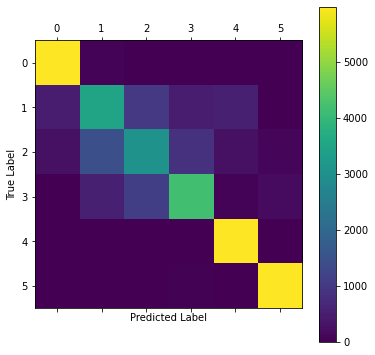

In [57]:
from sklearn.metrics import accuracy_score
net = Network(outputdimension=6,inputdimension=X_train_scaled.shape[1],precision=10000)
net.add(FCLayer(X_train_scaled.shape[1], 6))
#net.add(ActivationLayer(sigmoid, sigmoid_derivative))
# train
net.use(mse, mse_prime)
net.fit(X_train_scaled, y_train, epochs=1, learning_rate=1000)
# test
out = net.predict(X_train_scaled)
print_report(net,X_test_scaled,y_test,name="CR_filtered_small.txt")
print_confusion_matrix(net,X_test_scaled,y_test,name="CM_filtered_small.png")
print(accuracy_score(y_test,net.predict(X_test_scaled)))

{'1': {'precision': 0.9998336936637285, 'recall': 0.9993351063829787, 'f1-score': 0.9995843378501954, 'support': 6016}, '2': {'precision': 0.977105614973262, 'recall': 0.980546704678853, 'f1-score': 0.9788231355151921, 'support': 5963}, '3': {'precision': 0.9871215922395049, 'recall': 0.982193376601764, 'f1-score': 0.9846513179846513, 'support': 6009}, '4': {'precision': 0.9855337545726638, 'recall': 0.9819416832339297, 'f1-score': 0.9837344398340249, 'support': 6036}, '5': {'precision': 0.9996669442131557, 'recall': 0.9995004995004995, 'f1-score': 0.9995837149279827, 'support': 6006}, '6': {'precision': 0.9935526533311291, 'recall': 0.9993348852677086, 'f1-score': 0.9964353809168532, 'support': 6014}, 'accuracy': 0.9904838530684719, 'macro avg': {'precision': 0.9904690421655739, 'recall': 0.990475375944289, 'f1-score': 0.9904687211714833, 'support': 36044}, 'weighted avg': {'precision': 0.9904838807460868, 'recall': 0.9904838530684719, 'f1-score': 0.9904803782844088, 'support': 36044}

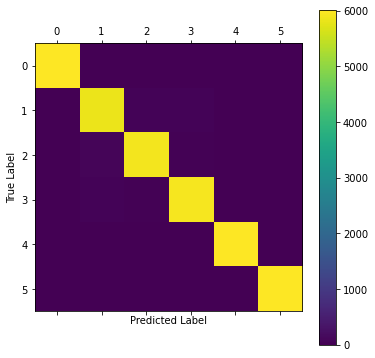

In [58]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf=svm.SVC()
clf.fit(X_train_scaled, y_train)
print_report(clf,X_test_scaled,y_test,name="CR_SVM_filtered_small.txt")
print_confusion_matrix(clf,X_test_scaled,y_test,name="CM_SVM_filtered_small.png")
print(accuracy_score(y_test,clf.predict(X_test_scaled)))

In [59]:
# tuned_parameters = [
#     {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
#     {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
# ]
#
# scores = ["precision", "recall"]
#
# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()
#
#     clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
#     clf.fit(X_train_scaled, y_train)
#
#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_["mean_test_score"]
#     stds = clf.cv_results_["std_test_score"]
#     for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
#         print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
#     print()
#
#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test_scaled)
#     print(classification_report(y_true, y_pred))
#     print()

In [60]:
# print_report(clf,X_test_scaled,y_test)
# print_confusion_matrix(clf,X_test_scaled,y_test)
# print(accuracy_score(y_test,clf.predict(X_test_scaled)))

/tmp/ipykernel_9777/414121165.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Device Number:  1
{'1': {'precision': 0.7624857033930614, 'recall': 0.9973404255319149, 'f1-score': 0.8642419877565719, 'support': 6016}, '2': {'precision': 0.4406779661016949, 'recall': 0.48398457152440044, 'f1-score': 0.46131713554987214, 'support': 5963}, '3': {'precision': 0.518352365415987, 'recall': 0.42303211848893324, 'f1-score': 0.4658663978740951, 'support': 6009}, '4': {'precision': 0.6241917078737163, 'recall': 0.27186878727634195, 'f1-score': 0.3787651471436815, 'support': 6036}, '5': {'precision': 0.7483870967741936, 'recall': 0.9463869463869464, 'f1-score': 0.835820895522388, 'support': 6006}, '6': {'precision': 0.9182825484764543, 'recall': 0.992184901895577, 'f1-score': 0.9538043478260868, 'support': 6014}, 'accuracy': 0.6858284319165464, 'macro avg': {'precision': 0.668729564672518, 'recall': 0.685799625184019, 'f1-score': 0.6599693186121159, 'support': 36044}, 'weighted avg': {'precision': 0.669033441509008, 'recall': 0.6858284319165464, 'f1-score': 0.660077991814051

/tmp/ipykernel_9777/414121165.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Device Number:  2
{'1': {'precision': 0.8892759769766737, 'recall': 0.9758976063829787, 'f1-score': 0.9305753685211602, 'support': 6016}, '2': {'precision': 0.5156464452374416, 'recall': 0.6300519872547375, 'f1-score': 0.5671371424258433, 'support': 5963}, '3': {'precision': 0.6312925170068027, 'recall': 0.3860875353636212, 'f1-score': 0.47914085088806274, 'support': 6009}, '4': {'precision': 0.6924710880339863, 'recall': 0.4860834990059642, 'f1-score': 0.5712060741750218, 'support': 6036}, '5': {'precision': 0.8897529734675206, 'recall': 0.9715284715284715, 'f1-score': 0.9288443170964662, 'support': 6006}, '6': {'precision': 0.7689305230288837, 'recall': 0.9827070169604257, 'f1-score': 0.8627737226277372, 'support': 6014}, 'accuracy': 0.7387359893463544, 'macro avg': {'precision': 0.7312282539585514, 'recall': 0.7387260194160331, 'f1-score': 0.7232795792890485, 'support': 36044}, 'weighted avg': {'precision': 0.7314970806972363, 'recall': 0.7387359893463544, 'f1-score': 0.723407434535

/tmp/ipykernel_9777/414121165.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Device Number:  3
{'1': {'precision': 0.8096398591930679, 'recall': 0.9940159574468085, 'f1-score': 0.8924041187882406, 'support': 6016}, '2': {'precision': 0.3421641791044776, 'recall': 0.30756330706020457, 'f1-score': 0.32394241808707935, 'support': 5963}, '3': {'precision': 0.6180052956751986, 'recall': 0.582626060908637, 'f1-score': 0.5997944149391811, 'support': 6009}, '4': {'precision': 0.44673812359401877, 'recall': 0.5593108018555335, 'f1-score': 0.4967262561612594, 'support': 6036}, '5': {'precision': 0.956913007908372, 'recall': 0.5842490842490843, 'f1-score': 0.725524656259692, 'support': 6006}, '6': {'precision': 0.898736152285848, 'recall': 0.9577652144995011, 'f1-score': 0.9273122434194638, 'support': 6014}, 'accuracy': 0.6647430917767173, 'macro avg': {'precision': 0.6786994362934972, 'recall': 0.6642550710032948, 'f1-score': 0.6609506846091527, 'support': 36044}, 'weighted avg': {'precision': 0.6789879667621805, 'recall': 0.6647430917767173, 'f1-score': 0.66133428744486

/tmp/ipykernel_9777/414121165.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Device Number:  4
{'1': {'precision': 0.8645348837209302, 'recall': 0.9886968085106383, 'f1-score': 0.9224565756823822, 'support': 6016}, '2': {'precision': 0.6655244622120693, 'recall': 0.5862820727821566, 'f1-score': 0.62339514978602, 'support': 5963}, '3': {'precision': 0.6458070333633904, 'recall': 0.5959394241970378, 'f1-score': 0.6198719058334776, 'support': 6009}, '4': {'precision': 0.7038684719535784, 'recall': 0.602882703777336, 'f1-score': 0.6494734963412457, 'support': 6036}, '5': {'precision': 0.9096023278370514, 'recall': 0.7807192807192808, 'f1-score': 0.8402472896693844, 'support': 6006}, '6': {'precision': 0.7152095510508644, 'recall': 0.9562687063518457, 'f1-score': 0.8183564567769477, 'support': 6014}, 'accuracy': 0.7519698146709577, 'macro avg': {'precision': 0.750757788356314, 'recall': 0.7517981660563825, 'f1-score': 0.7456334790149096, 'support': 36044}, 'weighted avg': {'precision': 0.7508353848029443, 'recall': 0.7519698146709577, 'f1-score': 0.7457540033392316,

/tmp/ipykernel_9777/414121165.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Device Number:  5
{'1': {'precision': 0.3207225630538514, 'recall': 0.31283244680851063, 'f1-score': 0.3167283742847526, 'support': 6016}, '2': {'precision': 0.2918149466192171, 'recall': 0.3575381519369445, 'f1-score': 0.3213505162408622, 'support': 5963}, '3': {'precision': 0.4317589576547231, 'recall': 0.4411715759693793, 'f1-score': 0.43641451971355666, 'support': 6009}, '4': {'precision': 0.47209203238176395, 'recall': 0.36713055003313455, 'f1-score': 0.4130475302889096, 'support': 6036}, '5': {'precision': 0.6026666666666667, 'recall': 0.5268065268065268, 'f1-score': 0.5621890547263683, 'support': 6006}, '6': {'precision': 0.7525788387857353, 'recall': 0.8491852344529431, 'f1-score': 0.79796875, 'support': 6014}, 'accuracy': 0.4758628343136167, 'macro avg': {'precision': 0.47860566752699296, 'recall': 0.47577741433457316, 'f1-score': 0.47461645754240817, 'support': 36044}, 'weighted avg': {'precision': 0.4788361915015906, 'recall': 0.4758628343136167, 'f1-score': 0.47477284138859

/tmp/ipykernel_9777/414121165.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Device Number:  6
{'1': {'precision': 0.5938461538461538, 'recall': 0.8982712765957447, 'f1-score': 0.7150039693040486, 'support': 6016}, '2': {'precision': 0.11968325791855204, 'recall': 0.08871373469730001, 'f1-score': 0.101897332177598, 'support': 5963}, '3': {'precision': 0.30759358288770056, 'recall': 0.23930770510900315, 'f1-score': 0.26918757019842754, 'support': 6009}, '4': {'precision': 0.7510871816110996, 'recall': 0.6008946322067594, 'f1-score': 0.66764841233318, 'support': 6036}, '5': {'precision': 0.8224672639558925, 'recall': 0.9935064935064936, 'f1-score': 0.8999321318150968, 'support': 6006}, '6': {'precision': 0.9495229835212489, 'recall': 0.9102095111406717, 'f1-score': 0.9294507173783852, 'support': 6014}, 'accuracy': 0.6225446676284541, 'macro avg': {'precision': 0.5907000706234412, 'recall': 0.621817225542662, 'f1-score': 0.5971866888677894, 'support': 36044}, 'weighted avg': {'precision': 0.59145243054321, 'recall': 0.6225446676284541, 'f1-score': 0.59791534222807

/tmp/ipykernel_9777/414121165.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Device Number:  7
{'1': {'precision': 0.7205899988008154, 'recall': 0.9988364361702128, 'f1-score': 0.8371995820271682, 'support': 6016}, '2': {'precision': 0.6024335733796871, 'recall': 0.4068421935267483, 'f1-score': 0.4856856856856856, 'support': 5963}, '3': {'precision': 0.44052464947987335, 'recall': 0.32418039607255783, 'f1-score': 0.37350206116383855, 'support': 6009}, '4': {'precision': 0.6113780809176872, 'recall': 0.6534128561961564, 'f1-score': 0.6316969648434373, 'support': 6036}, '5': {'precision': 0.8531618435155413, 'recall': 0.9277389277389277, 'f1-score': 0.8888888888888888, 'support': 6006}, '6': {'precision': 0.9470832005100415, 'recall': 0.9880279348187563, 'f1-score': 0.9671223958333334, 'support': 6014}, 'accuracy': 0.7169293086227944, 'macro avg': {'precision': 0.6958618911006077, 'recall': 0.7165064574205599, 'f1-score': 0.6973492630737254, 'support': 36044}, 'weighted avg': {'precision': 0.6959443997895414, 'recall': 0.7169293086227944, 'f1-score': 0.6976188533

/tmp/ipykernel_9777/414121165.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Device Number:  8
{'1': {'precision': 0.9159434265509483, 'recall': 0.9473071808510638, 'f1-score': 0.931361333551234, 'support': 6016}, '2': {'precision': 0.7928712871287129, 'recall': 0.335737045111521, 'f1-score': 0.4717247879359096, 'support': 5963}, '3': {'precision': 0.611071807569862, 'recall': 0.5749708770178066, 'f1-score': 0.5924719197462059, 'support': 6009}, '4': {'precision': 0.4507612966601179, 'recall': 0.6081842279655401, 'f1-score': 0.517771509167842, 'support': 6036}, '5': {'precision': 0.8585111014366565, 'recall': 0.985014985014985, 'f1-score': 0.9174226564317283, 'support': 6006}, '6': {'precision': 0.8580508474576272, 'recall': 0.9428001330229464, 'f1-score': 0.8984313104103945, 'support': 6014}, 'accuracy': 0.7327988014648763, 'macro avg': {'precision': 0.7478682944673207, 'recall': 0.7323357414973105, 'f1-score': 0.7215305862072191, 'support': 36044}, 'weighted avg': {'precision': 0.7476270194608123, 'recall': 0.7327988014648763, 'f1-score': 0.7217457458532675, 

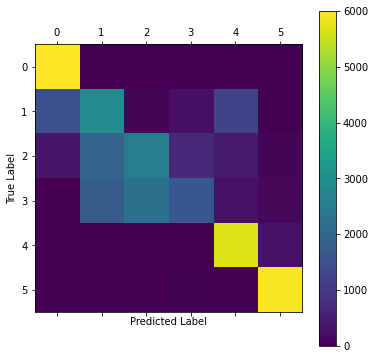

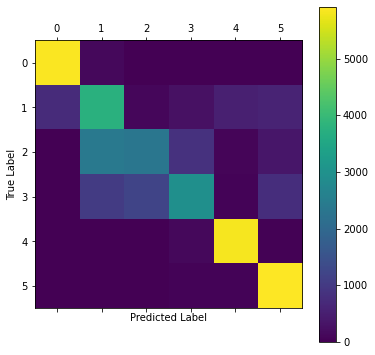

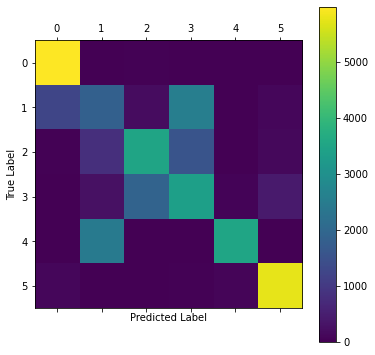

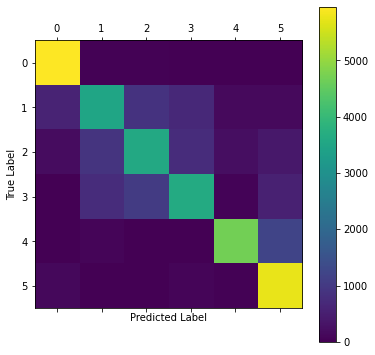

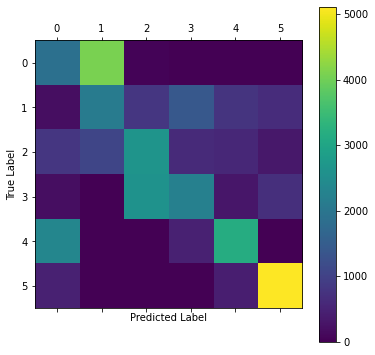

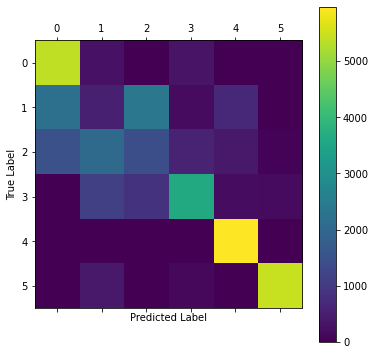

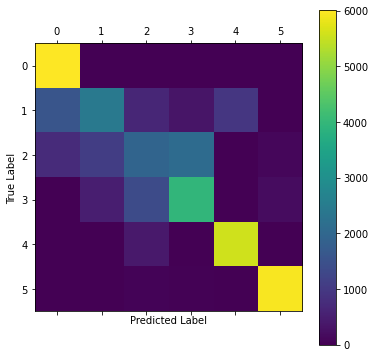

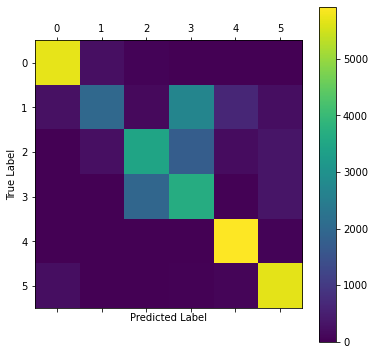

In [61]:
devices=range(1,9)
for device in devices:
    source="/home/nikolas/PycharmProjects/MasterThesis_SoftwareEngineering/Devices/Edge_Device/data/"+"Device_"+str(device)+"/device_data.txt"
    data=pd.read_csv(source,names=["T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro", "T_xmag", "T_ymag", "T_zmag",
"RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
"LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
"RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
"LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag",
"Activity"])

    activity_mapping={
        2:1,
        3:1,
        4:1,
        16:15,
        6: 5,
        10:11,
        13:14,
        7:1,
    }
    filtered_activities=[5,11,12,14,15,17]
    data_filtered=data
    for key in activity_mapping.keys():
        data_filtered[data_filtered['Activity']==key]['Activity']=activity_mapping[key]
    data_filtered=data_filtered[data_filtered['Activity'].isin(filtered_activities)]
    activity_encoding = {
        5:1,
            11: 2,
        12: 3,
        14: 4,
        15: 5,
        17: 6,
    }
    for key in activity_encoding.keys():
        data_filtered.loc[data_filtered['Activity'] == key, 'Activity'] = activity_encoding[key]
    data_small=data_filtered.drop(columns= ["T_xacc", "T_yacc", "T_zacc", "T_xgyro","T_ygyro","T_zgyro","T_xmag", "T_ymag", "T_zmag","RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro","RA_ygyro","RA_zgyro","RA_xmag", "RA_ymag", "RA_zmag","RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro","RL_ygyro","RL_zgyro" ,"RL_xmag", "RL_ymag", "RL_zmag","LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro","LL_ygyro","LL_zgyro" ,"LL_xmag", "LL_ymag", "LL_zmag"])
    X_train_scaled, y_train = prepData(data_small, True)
    X_test_scaled, y_test = prepData(test_filtered, True)
    print("Device Number: ",device)
    net = Network(outputdimension=6,inputdimension=X_train_scaled.shape[1],precision=10000)
    net.add(FCLayer(X_train_scaled.shape[1], 6))
    #net.add(ActivationLayer(sigmoid, sigmoid_derivative))
    # train
    net.use(mse, mse_prime)
    net.fit(X_train_scaled, y_train, epochs=1, learning_rate=1000)
    # test
    out = net.predict(X_train_scaled)
    print_report(net,X_test_scaled,y_test,name="CR_partial_device_"+str(device)+".txt")
    print_confusion_matrix(net,X_test_scaled,y_test,name="CM_partial_device_"+str(device)+".png")
    print(accuracy_score(y_test,net.predict(X_test_scaled)))

In [62]:
df_describe = pd.DataFrame(X_train_scaled)
df_describe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40449 entries, 0 to 40448
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40449 non-null  float64
 1   1       40449 non-null  float64
 2   2       40449 non-null  float64
 3   3       40449 non-null  float64
 4   4       40449 non-null  float64
 5   5       40449 non-null  float64
 6   6       40449 non-null  float64
 7   7       40449 non-null  float64
 8   8       40449 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [63]:
df_describe = pd.DataFrame(X_test_scaled)
df_describe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36044 entries, 0 to 36043
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       36044 non-null  float64
 1   1       36044 non-null  float64
 2   2       36044 non-null  float64
 3   3       36044 non-null  float64
 4   4       36044 non-null  float64
 5   5       36044 non-null  float64
 6   6       36044 non-null  float64
 7   7       36044 non-null  float64
 8   8       36044 non-null  float64
dtypes: float64(9)
memory usage: 2.5 MB
